## Machine Learning Project to find best location to open a franchise for Madurai Idly Shop in Bangalore  

Importing necessary libraries 

In [1]:
#!pip install bs4
#!conda install -c conda-forge geopy --yes

#libraries for data wrangling
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
#libraries to access and use web data
import requests
from bs4 import BeautifulSoup
# libraries to ger location information
from geopy.geocoders import Nominatim
# Machine Learning Libraries
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
#Plotting Libraries
import matplotlib.pyplot as plt
import folium


Let us get the current locations of Madurai Idly shop from the csv file.

In [2]:
df = pd.read_csv('MISLocations.csv')
df.head()

,Location,Latitude,Longitude
0,Indiranagar,12.971975,77.647016
1,Koramangala,12.937187,77.624685
2,Domlur,12.954652,77.641123
3,Mahadevpura (Near Phoenix Market City),12.994100,77.700229
4,Marathahalli,12.950098,77.700842


Getting the coordinates of Bangalore using Geopy

In [3]:
address = 'Bengaluru'

geolocator = Nominatim(user_agent="Foursquare_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bangalore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bangalore are 12.9791198, 77.5912997.


Plotting the map of Bangalore containing the locations of Madurai Idly shop

In [4]:
map_clusters = folium.Map(location=[latitude,longitude],zoom_start=11)
# adding markers to the map
for lat,lon,location in zip(df['Latitude'], df['Longitude'], df['Location']):
    label = folium.Popup(location)
    folium.Circle(
        [lat, lon],
        radius=4000,
        popup=label,
        color='red',
        fill=True,
        fill_color='green',
        fill_opacity=0.2).add_to(map_clusters)
    folium.Marker([lat, lon], popup=location).add_to(map_clusters)
map_clusters

Each circle has a radius of 4 KM as any shop can deliver food in a radius of 4 KM via Swiggy, Zomato or any other service. The owners of Madurai Idly shop want to spread out this coverage area as much as possible so that they could get access to more online-orders.

##### 1. From the map, we can clearly see that there are no Madurai idly shops in the western half of Bangalore. Hence setting shops in the western half would be profitable 


In [5]:
map_clusters = folium.Map(location=[12.93718652,77.62468527],zoom_start=12.4)
# adding markers to the map
for lat,lon,location in zip(df['Latitude'], df['Longitude'], df['Location']):
    if location not in ['Koramangala','BTM Layout','Domlur']: continue
    label = folium.Popup(location)
    folium.Circle(
        [lat, lon],
        radius=4000,
        popup=label,
        color='red',
        fill=True,
        fill_color='green',
        fill_opacity=0.2).add_to(map_clusters)
    folium.Marker([lat, lon], popup=location).add_to(map_clusters)
        
map_clusters

##### 2. We can also see that most of area of the Koramangala outlet is coverd by two other outlets, BTM Layout and Domlur.



In [6]:
map_clusters = folium.Map(location=[12.97197492,77.64701553],zoom_start=13)
# adding markers to the map
for lat,lon,location in zip(df['Latitude'], df['Longitude'], df['Location']):
    if location not in ['Indiranagar','YELAHANKA']: continue
    label = folium.Popup(location)
    folium.Circle(
        [lat, lon],
        radius=4000,
        popup=label,
        color='red',
        fill=True,
        fill_color='green',
        fill_opacity=0.2).add_to(map_clusters)
    folium.Marker([lat, lon], popup=location).add_to(map_clusters)
        
map_clusters

##### 3. Morevoer the Indranagar outlet and the Yelahanka outlet are situated too close to each other. Which will lead to competition between the two outlets for online orders. 

Now let us plot the top 50 south Indian vegetarian restaurants in Bangalore using Foursquare

In [7]:
CLIENT_ID = '3OOEP41315WD1TPGACEYNLNSVW3GD1FFZG4MJWOTJAVMDJ1W'
CLIENT_SECRET = 'FMMGH2QGV5R1KUZSYKD30EJ10WMA5CXEWZQ5VBSO1LZX03WC'
ACCESS_TOKEN = '4YKTHM33VK0JDYZLF5SGHEIWYZA1MSXVAXZS2RR3TKZNOEHE'
VERSION = '20210725'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3OOEP41315WD1TPGACEYNLNSVW3GD1FFZG4MJWOTJAVMDJ1W
CLIENT_SECRET:FMMGH2QGV5R1KUZSYKD30EJ10WMA5CXEWZQ5VBSO1LZX03WC


We would like to find the top 50 South Indian restaurants in Bangalore. To do this we cannot use the query parameter as the search string contains multiple words. Using it anyway would lead to undesirable results. Hence we use the category id parameter of the Foursquare API. We can use any of the following category ids :

1.Restaurant-
4bf58dd8d48988d1c4941735

2.Breakfast Spot-
4bf58dd8d48988d143941735

3.South Indian Restaurant-
54135bf5e4b08f3d2429dfde

4.Vegetarian / Vegan Restaurant-
4bf58dd8d48988d1d3941735

5.Chettinad Restaurant-
54135bf5e4b08f3d2429dff2

Since Madurai idly shops is a South Indian Vegetarian Restaurant we can use the 3rd ID. We do not use the 4th id (Vegetarian / Vegan Restaurant) as this would yield other cuisines also. Restricting our search to South Indian Restaurants would be better as it would help us to find places that South-Indians visit for their native cuisines.

Moreover we limit our search radius to 8 KM form the center of Bangalore. Which would approximately cover the below regions


In [8]:
map_clusters = folium.Map(location=[latitude,longitude],zoom_start=11)
# adding markers to the map
for lat,lon,location in zip(df['Latitude'], df['Longitude'], df['Location']):
    label = folium.Popup(location)
    folium.Circle(
        [lat, lon],
        radius=4000,
        popup=label,
        color='red',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.1).add_to(map_clusters)
    folium.Marker([lat, lon], popup=location).add_to(map_clusters)

label = folium.Popup('Bangalore')
folium.Circle(
        [latitude, longitude],
        radius=10000,
        popup=label,
        color='red',
        fill=True,
        fill_color='blue',
        fill_opacity=0.2).add_to(map_clusters)
folium.Marker([lat, lon], popup=location).add_to(map_clusters)
    
map_clusters

In [9]:
categoryId = '54135bf5e4b08f3d2429dfde'
radius =8000


In [10]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, categoryId, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=3OOEP41315WD1TPGACEYNLNSVW3GD1FFZG4MJWOTJAVMDJ1W&client_secret=FMMGH2QGV5R1KUZSYKD30EJ10WMA5CXEWZQ5VBSO1LZX03WC&ll=12.9791198,77.5912997&oauth_token=4YKTHM33VK0JDYZLF5SGHEIWYZA1MSXVAXZS2RR3TKZNOEHE&v=20210725&categoryId=54135bf5e4b08f3d2429dfde&radius=8000&limit=50'

In [11]:
results = requests.get(url).json()

In [12]:
venues = results['response']['venues']
dataframe = pd.json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood
0,6029709cc5e33466fb83a751,Idli Dosa Coffee (IDC),"[{'id': '54135bf5e4b08f3d2429dfde', 'name': 'S...",v-1627406861,False,Residency Road,Opposite Ritz-Carlton,12.968576,77.601461,"[{'label': 'display', 'lat': 12.968576, 'lng':...",1610,560025,IN,Bangalore,Karnātaka,India,"[Residency Road (Opposite Ritz-Carlton), Banga...",NaN
1,5d3da56890b8cc000884814f,Tks Iyengars,"[{'id': '54135bf5e4b08f3d2429dfde', 'name': 'S...",v-1627406861,False,NaN,NaN,12.991587,77.536910,"[{'label': 'display', 'lat': 12.991587, 'lng':...",6060,560079,IN,Bangalore,Karnātaka,India,"[Bangalore 560079, Karnātaka]",NaN
2,58aedf1be9efba4f7f71d37c,Go Native,"[{'id': '54135bf5e4b08f3d2429dfde', 'name': 'S...",v-1627406861,False,NaN,NaN,12.918259,77.584752,"[{'label': 'display', 'lat': 12.918259, 'lng':...",6812,NaN,IN,NaN,NaN,India,NaN,Jayanagar
3,5da4790ac059dd0008eede73,Arogya Aahara,"[{'id': '54135bf5e4b08f3d2429dfde', 'name': 'S...",v-1627406861,False,NaN,NaN,12.910787,77.582084,"[{'label': 'display', 'lat': 12.910787, 'lng':...",7672,560078,IN,Bangalore,Karnātaka,India,"[Bangalore 560078, Karnātaka]",NaN
4,60f2542ce9c95d3311732605,Trupthi Ahaar,"[{'id': '54135bf5e4b08f3d2429dfde', 'name': 'S...",v-1627406861,False,7th cross n r colony,3rd main,12.937706,77.568054,"[{'label': 'display', 'lat': 12.937706, 'lng':...",5254,560050,IN,Bangalore,Karnātaka,India,"[7th cross n r colony (3rd main), Bangalore 56...",Basavanagudi


The list of restaurants that we have considered are :

In [13]:
dataframe.name

0           Idli Dosa Coffee (IDC)
1                     Tks Iyengars
2                        Go Native
3                    Arogya Aahara
4                    Trupthi Ahaar
5                  Sendhoor Coffee
6                   Sri Udupi Park
7                New Udupi Upahara
8                    Mulbagal Dosa
9           Idli Dosa Coffee (IDC)
10                   indradarshini
11                       New Kudla
12                 Sendhoor Coffee
13             Raghavendra Tiffins
14           Brahmins' Thatte Idli
15               The Filter Coffee
16                 Pooja Dosa Camp
17                     Swaadam Veg
18               Sri Krishna Sagar
19                 SGS Gundu Palav
20                      Hot Coffee
21             Raghavendra Upahara
22                     Tasty Magic
23                  Andhra Ruchulu
24                 Sri Udupi Sagar
25                Mylapore Tiffins
26     MTR  1924 commercial street
27                        Elongo's
28             New P

let us plot these restaurants to get a sense of where they are located:

In [14]:
map_clusters = folium.Map(location=[latitude,longitude],zoom_start=11.5)

for lat,lon,name in zip(dataframe['location.lat'],dataframe['location.lng'],dataframe['name']):
    folium.CircleMarker([lat, lon],radius=5,color='blue',fill=True,fill_color='yellow',fill_opacity=0.1).add_to(map_clusters)
map_clusters

As we need the centroid of the clusters we shall use k-means Clustering based on the latitude and longitude of the restaurants.

In [15]:
cluster_df = dataframe[['location.lat','location.lng']].copy()
cluster_df.head()

,location.lat,location.lng
0,12.968576,77.601461
1,12.991587,77.536910
2,12.918259,77.584752
3,12.910787,77.582084
4,12.937706,77.568054


let us use the elbow method to find the optimal value of K 

In [16]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(cluster_df)
    kmeanModel.fit(cluster_df)
 
    distortions.append(sum(np.min(cdist(cluster_df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / cluster_df.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(cluster_df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / cluster_df.shape[0]
    mapping2[k] = kmeanModel.inertia_

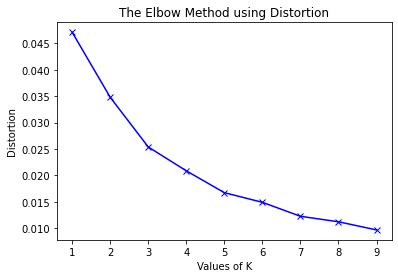

In [17]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

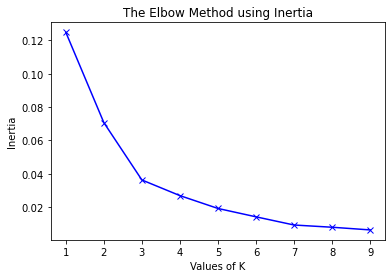

In [18]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

As the elbow method does not yield a clear value for k, let us use the Silhouette Method

In [19]:

from sklearn.metrics import silhouette_score

no_of_clusters = range(2,10)
  
for n_clusters in no_of_clusters:
  
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(cluster_df)
  
    # The silhouette_score gives the 
    # average value for all the samples.
    silhouette_avg = silhouette_score(cluster_df, cluster_labels)
  
    print("For no of clusters =", n_clusters,
          " The average silhouette_score is :", silhouette_avg)

For no of clusters = 2  The average silhouette_score is : 0.39064653766533153
For no of clusters = 3  The average silhouette_score is : 0.4915527355304148
For no of clusters = 4  The average silhouette_score is : 0.4531405975143317
For no of clusters = 5  The average silhouette_score is : 0.4594679747394002
For no of clusters = 6  The average silhouette_score is : 0.5138375054797043
For no of clusters = 7  The average silhouette_score is : 0.5488755911769421
For no of clusters = 8  The average silhouette_score is : 0.5550435328020445
For no of clusters = 9  The average silhouette_score is : 0.5534934120686947


Let us choose K = 5 as the silhouette scores are high 5,6,7 , and the elbow method indicates towards 5. Moreover it is better to choose a smaller value of K as increasing the number of cluster will show a smaller error value.

In [20]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means.fit(cluster_df)
dataframe[['Labels']] = k_means.labels_

In [21]:
map_clusters1 = folium.Map(location=[latitude,longitude],zoom_start=11)
colours = ['red', 'blue', 'green', 'purple', 'orange', 'beige', 'darkblue', 'pink',  'black', 'white']
for lat,lon,label in zip(dataframe['location.lat'],dataframe['location.lng'],dataframe['Labels']):
    folium.CircleMarker([lat, lon],radius=5,color=colours[label],fill=True,fill_color=colours[label],fill_opacity=0.1).add_to(map_clusters1)
map_clusters1

Plotting the centers of the centroids of clusters along with the existing shops (with radius of 4KM)

In [22]:
df1 = pd.DataFrame(k_means.cluster_centers_.tolist())
df1.columns =['lat','lon']
df1

,lat,lon
0,12.972517,77.633762
1,12.953145,77.577041
2,12.918686,77.606710
3,13.006763,77.561883
4,13.014921,77.638146


In [23]:
map_clusters = folium.Map(location=[latitude,longitude],zoom_start=11)
# adding markers to the map
for lat,lon,location in zip(df['Latitude'], df['Longitude'], df['Location']):
    label = folium.Popup(location)
    folium.Circle(
        [lat, lon],
        radius=4000,
        popup=label,
        color='red',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.2).add_to(map_clusters)
    folium.Marker([lat, lon], popup=location).add_to(map_clusters)
i=1
for lat,lon in zip(df1['lat'],df1['lon']):
    folium.Circle(
        [lat, lon],
        radius=4000,
        color='white',
        fill=True,
        fill_color='blue',
        fill_opacity=0.2).add_to(map_clusters)
    string = str(lat)+' '+str(lon)
    folium.Marker([lat, lon], popup=string).add_to(map_clusters)
    

colours = ['red', 'blue', 'green', 'purple', 'orange', 'beige', 'darkblue', 'pink',  'black', 'white']
for lat,lon,label in zip(dataframe['location.lat'],dataframe['location.lng'],dataframe['Labels']):
    folium.CircleMarker([lat, lon],radius=5,color=colours[label],fill=True,fill_color=colours[label],fill_opacity=0.1).add_to(map_clusters)

map_clusters

From the above visual plot it is clear that the centroid 12.937559061595922,77.5614229072329 would be a good location Madurai Idly Shop as it does not breach into the radius of other existing locations of Madurai Idly Shop. Moreover the chosen location has a good number of South Indian Vegetarian restaurants located nearby which would be ideal.

Centroid 13.008001813279995,77.56339054871916 would also be a good location to open another shop, By doing so the owners of Madurai Idly Shop would be able to cover Majority of the area in central Bangalore

##### Plotting the existing locations of Madurai Idly Shop and in yellow and the two viable location in white. And plotting the restaurants around the new areas to get an idea of the final result 

In [24]:
map_clusters = folium.Map(location=[latitude,longitude],zoom_start=11)
# adding markers to the map
for lat,lon,location in zip(df['Latitude'], df['Longitude'], df['Location']):
    label = folium.Popup(location)
    folium.Circle(
        [lat, lon],
        radius=4000,
        popup=label,
        color='red',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.2).add_to(map_clusters)
    folium.Marker([lat, lon], popup=location).add_to(map_clusters)

folium.Circle([12.937559061595922,77.5614229072329],radius=4000,color='white',fill=True,fill_color='blue',fill_opacity=0.2).add_to(map_clusters)
folium.Marker([12.937559061595922,77.5614229072329], popup="New Shop 1").add_to(map_clusters)

folium.Circle([13.008001813279995,77.56339054871916],radius=4000,color='white',fill=True,fill_color='blue',fill_opacity=0.2).add_to(map_clusters)
folium.Marker([13.008001813279995,77.56339054871916], popup="New Shop 2" ).add_to(map_clusters)

colours = ['red', 'blue', 'green', 'purple', 'orange', 'beige', 'darkblue', 'pink',  'black', 'white']
for lat,lon,label in zip(dataframe['location.lat'],dataframe['location.lng'],dataframe['Labels']):
    if label not in [1,3]:continue
    else: folium.CircleMarker([lat, lon],radius=5,color=colours[label],fill=True,fill_color=colours[label],fill_opacity=0.1).add_to(map_clusters)


              
map_clusters

Getting the locations of both the shops using the latitude and longitude 

In [25]:
geolocator = Nominatim(user_agent="Shops")
Latitude = "12.937559061595922"
Longitude = "77.5614229072329"
  
location = geolocator.reverse(Latitude+","+Longitude)
location

Location(8th Cross Road, Hanumantha Nagar, Vidyapeeta ward, South Zone, Bengaluru, Bangalore North, Bangalore Urban, Karnataka, 560028, India, (12.937582570771152, 77.5614245039725, 0.0))

In [26]:
Latitude = "13.008001813279995"
Longitude = "77.56339054871916"
  
location = geolocator.reverse(Latitude+","+Longitude)
location

Location(ICICI Bank Insurance, 17th Cross Road, Malleswaram, West Zone, Bengaluru, Bangalore North, Bangalore Urban, Karnataka, 560055, India, (13.007789200000001, 77.56351726728587, 0.0))